# Stock Price Prediction using Time Series Forecasting

In [30]:
import yfinance as yf
import pandas as pd

In [31]:
data = yf.download('AAPL',start='2015-01-01',end='2024-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02 00:00:00+00:00,24.373957,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05 00:00:00+00:00,23.687304,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06 00:00:00+00:00,23.689533,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07 00:00:00+00:00,24.021713,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08 00:00:00+00:00,24.944687,27.972500,28.037500,27.174999,27.307501,237458000


In [32]:
data = data[['Close']]
data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02 00:00:00+00:00,27.332500
2015-01-05 00:00:00+00:00,26.562500
2015-01-06 00:00:00+00:00,26.565001
2015-01-07 00:00:00+00:00,26.937500
2015-01-08 00:00:00+00:00,27.972500


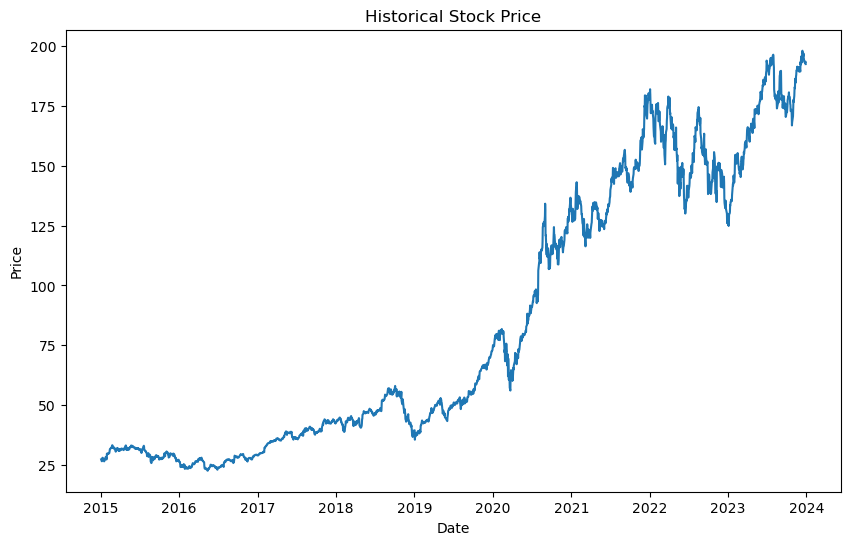

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(data['Close'])
plt.title('Historical Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [34]:
#Decompose the time series to identify trend and seasonality

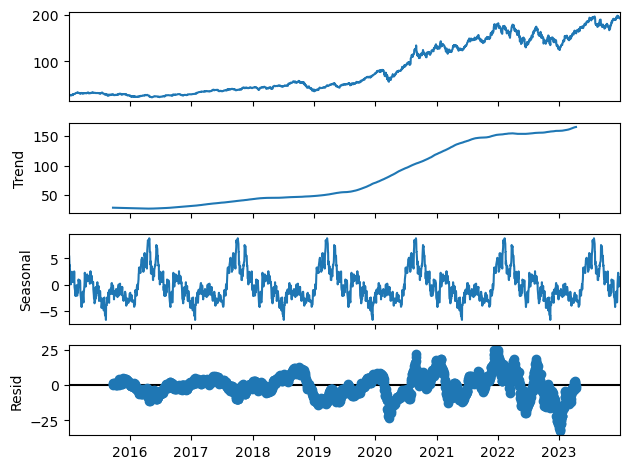

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(data['Close'], model='additive', period=365)

decomposition.plot()
plt.show()

In [36]:
#Using Prophet: Ideal for data with strong seasonal patterns

In [37]:
data.head()


Price,Close
Ticker,AAPL
Date,
2015-01-02 00:00:00+00:00,27.332500
2015-01-05 00:00:00+00:00,26.562500
2015-01-06 00:00:00+00:00,26.565001
2015-01-07 00:00:00+00:00,26.937500
2015-01-08 00:00:00+00:00,27.972500


In [38]:
print(data.columns)

MultiIndex([('Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [39]:
data.reset_index(inplace=True)

In [40]:
print(data.columns)

MultiIndex([( 'Date',     ''),
            ('Close', 'AAPL')],
           names=['Price', 'Ticker'])


In [41]:
# Flatten the MultiIndex columns
data.columns = ['_'.join(col).strip() for col in data.columns.values]


In [42]:
print(data.columns)

Index(['Date_', 'Close_AAPL'], dtype='object')


In [43]:
data = data[['Date_', 'Close_AAPL']]
data.columns = ['ds', 'y']

In [44]:
print(data.columns)

Index(['ds', 'y'], dtype='object')


In [45]:
data.dtypes

ds    datetime64[ns, UTC]
y                 float64
dtype: object

15:26:45 - cmdstanpy - INFO - Chain [1] start processing
15:26:45 - cmdstanpy - INFO - Chain [1] done processing


             ds        yhat  yhat_lower  yhat_upper
2289 2024-01-24  177.596759  167.093594  188.594972
2290 2024-01-25  177.750038  166.617678  188.217001
2291 2024-01-26  177.906561  167.133349  188.635045
2292 2024-01-27  175.341064  164.865250  186.837090
2293 2024-01-28  175.599878  164.629388  186.830148


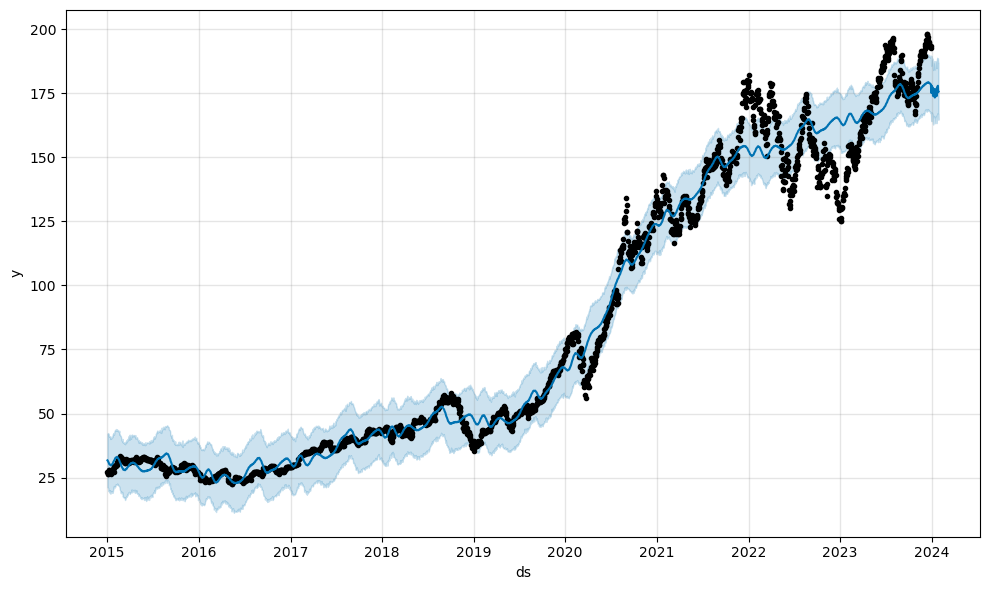

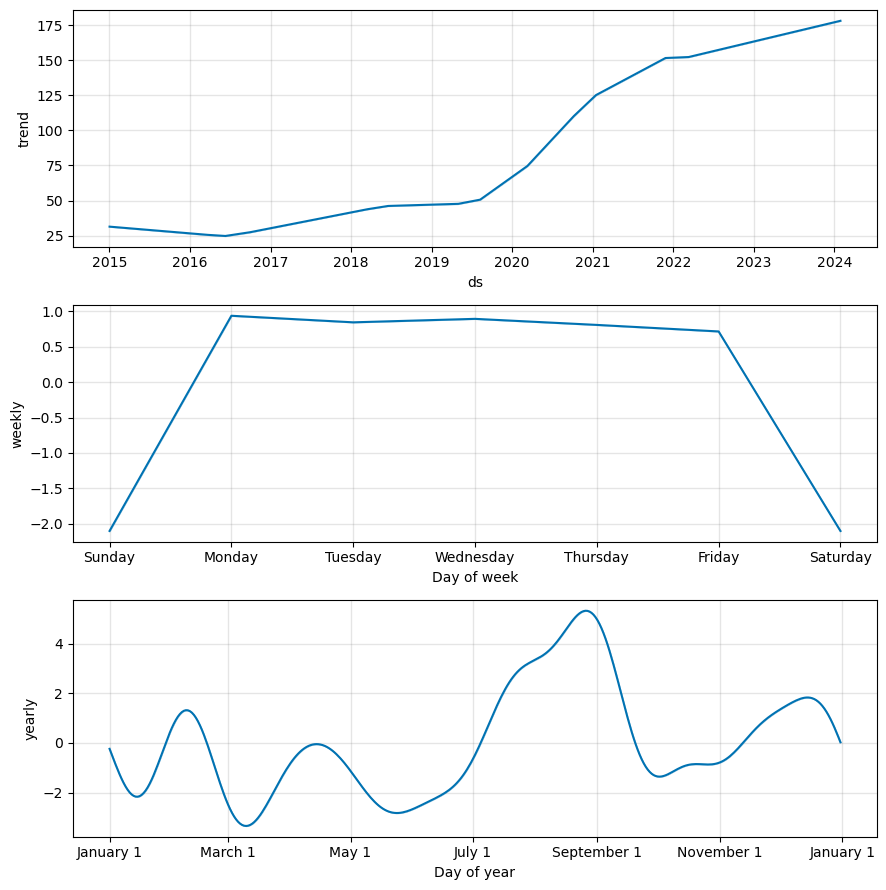

In [46]:
from prophet import Prophet


data['ds'] = pd.to_datetime(data['ds']).dt.tz_localize(None)

# Initialize and fit the model
model = Prophet()
model.fit(data)

# Create a future dataframe for 30 days into the future
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Review the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Plot the forecast
model.plot(forecast)
plt.show()

# Plot forecast components
model.plot_components(forecast)
plt.show()


In [47]:
data.columns

Index(['ds', 'y'], dtype='object')

In [48]:
from sklearn.metrics import mean_squared_error

forecast = model.predict(data[['ds']])
forecast = forecast[['ds', 'yhat']]  

# Ensuring `data` and `forecast` align on the 'ds' column (dates)
merged_data = data.merge(forecast, on='ds')

# Extracting actual and predicted values
actual = merged_data['y'].values  # Actual values
predicted = merged_data['yhat'].values 

rmse = mean_squared_error(actual, predicted, squared=False)
print("RMSE:", rmse)


RMSE: 8.377125979671918


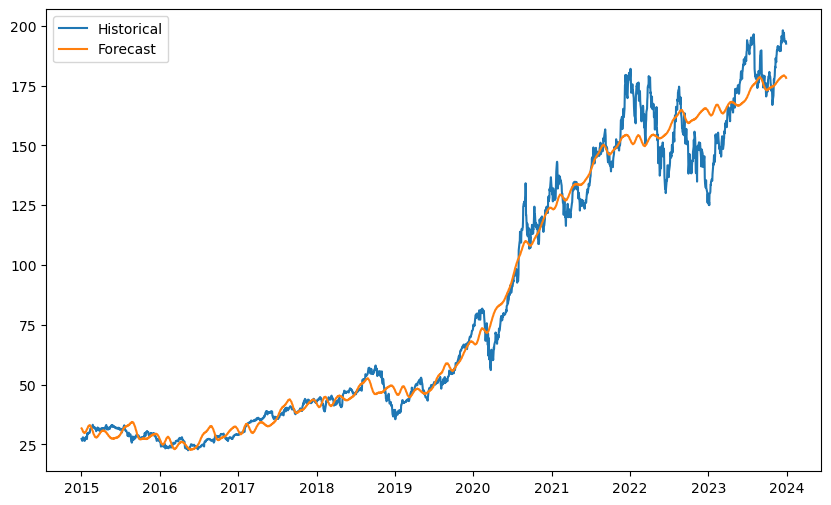

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Historical')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.legend()
plt.show()
